In [55]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Get a current image

In [ ]:
from camera import Camera
cam = Camera()
time.sleep(0.2) # for auto exposure

[0:15:09.908204290] [28904]  INFO Camera camera_manager.cpp:327 libcamera v0.4.0+53-29156679
[0:15:09.915513767] [28925]  INFO RPI pisp.cpp:720 libpisp version v1.1.0 e7974a156008 27-01-2025 (21:50:51)
[0:15:09.924784569] [28925]  INFO RPI pisp.cpp:1179 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/imx219@10 to CFE device /dev/media3 and ISP device /dev/media0 using PiSP variant BCM2712_D0
[0:15:09.928962759] [28904]  INFO Camera camera.cpp:1202 configuring streams: (0) 640x480-XBGR8888 (1) 640x480-BGGR_PISP_COMP1
[0:15:09.929067650] [28925]  INFO RPI pisp.cpp:1484 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/imx219@10 - Selected sensor format: 640x480-SBGGR10_1X10 - Selected CFE format: 640x480-PC1B


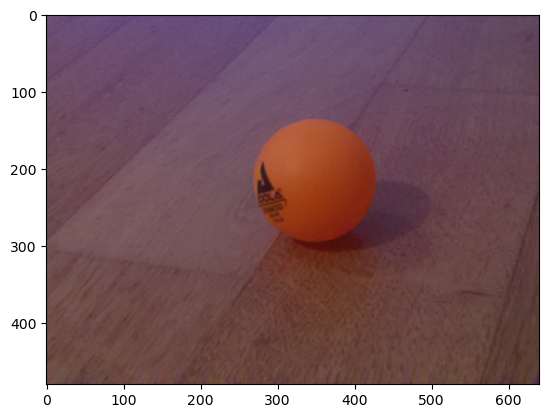

In [ ]:
f = cam()
plt.imshow(f)

In [ ]:
cv2.imwrite("../figures/ball.png", f[:,:,::-1])

True

# Detector

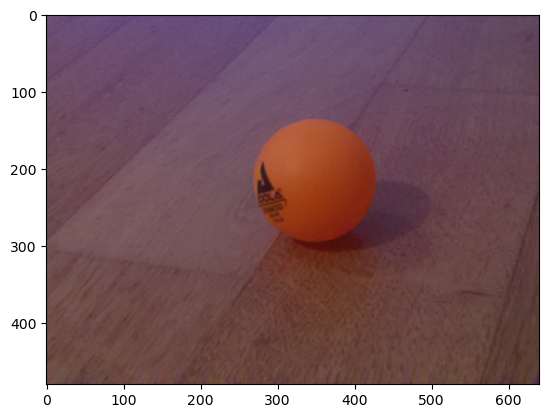

In [ ]:
f = cv2.imread("../figures/ball.png")[..., ::-1]
plt.imshow(f)

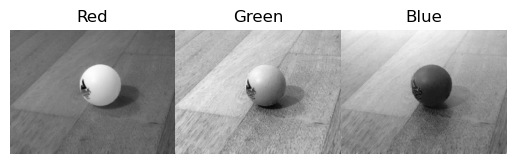

In [104]:
# show rgb channels
fig, ax = plt.subplots(1, 3)
for i in range(3):
	ax[i].axis("off")
	ax[i].imshow(f[...,i], cmap="gray")
	ax[i].set_title(["Red", "Green", "Blue"][i])
fig.subplots_adjust(wspace=0)
plt.savefig("../figures/rgb.png", dpi=300)
plt.show()

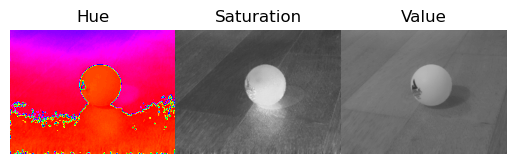

In [105]:
# show hsv channels
f_hsv =  cv2.cvtColor(f, cv2.COLOR_RGB2HSV).astype(float)
fig, ax = plt.subplots(1, 3)
for i in range(3):
	ax[i].axis("off")
	ax[i].imshow(f_hsv[...,i], cmap="gray", vmin=0, vmax=255)
	ax[i].set_title(["Hue", "Saturation", "Value"][i])
ax[0].imshow(f_hsv[...,0], cmap="hsv", vmin=0, vmax=179)
fig.subplots_adjust(wspace=0)
plt.savefig("../figures/hsv.png", dpi=300)
plt.show()

In [85]:
from detector import Detector
det = Detector()
mean = det.mean
std = det.std

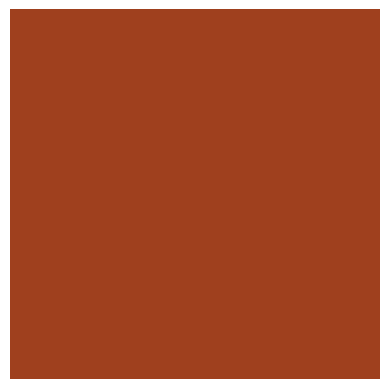

In [106]:
# show the mean reference color
plt.imshow(
	cv2.cvtColor((np.ones((2,2, 3))*mean).astype(np.uint8), cv2.COLOR_HSV2RGB)
)
plt.axis("off")
plt.savefig("../figures/mean.png", dpi=300)

In [127]:
np.max(diff)

-0.009399694208958085

In [ ]:
diff = -(f_hsv - det.mean)**2 / 10*std**2
fig, ax = plt.subplots(1, 3)
for i in range(3):
	ax[i].axis("off")
	ax[i].imshow(diff[...,i], cmap="gray")
	ax[i].set_title(["Hue", "Saturation", "Value"][i])
fig.subplots_adjust(wspace=0)
plt.savefig("../figures/diff.png", dpi=300)
plt.show()

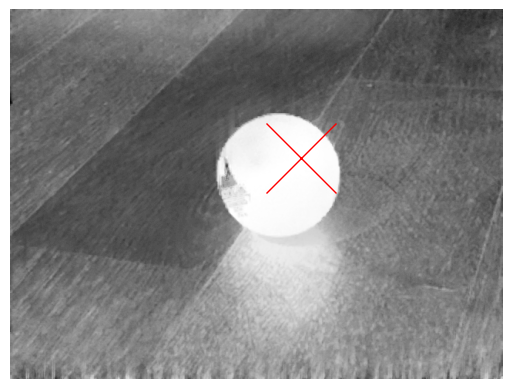

In [ ]:
w = np.sum(diff, axis=2)
amax = np.unravel_index(w.argmax(), w.shape)
plt.imshow(w, cmap="gray")
plt.plot([amax[1]], [amax[0]], "rx", ms=50)
plt.axis("off")
plt.savefig("../figures/weight.png", dpi=300)